In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
%matplotlib inline

In [19]:
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")
df.shape

(1000000, 34)

## Q1. 연령대별 허리둘레에 대한 기술통계를 구하려고 합니다. 다음 제공되는 딕셔너리를 통해 연령대코드(5세단위)를 "연령대"로 만들고 아래와 같은 기술통계값을 구해주세요!

In [4]:
age_code = {1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}

In [5]:
df['연령대'] = df['연령대코드(5세단위)'].apply(lambda x : age_code[x])
df.pivot_table(index='연령대',values='허리둘레',aggfunc='describe')

,25%,50%,75%,count,max,mean,min,std
연령대,,,,,,,,
20~24세,67.5,73.4,81.0,23244.0,999.0,75.152220,47.5,12.251781
25~29세,69.0,76.5,84.2,64898.0,999.0,77.704783,48.0,16.735734
30~34세,72.0,80.1,88.0,77517.0,999.0,81.089268,49.0,22.988111
35~39세,75.0,82.0,89.0,84621.0,999.0,82.094012,9.2,14.522095
40~44세,73.0,80.0,87.0,130912.0,999.0,80.488308,42.1,10.803098
45~49세,74.0,81.0,87.0,118357.0,137.0,80.822449,40.0,9.521622
50~54세,75.0,81.0,87.0,129833.0,142.0,81.062754,6.5,9.095438
55~59세,76.0,82.0,87.5,112175.0,139.0,81.799905,32.0,8.730398
60~64세,77.0,83.0,88.0,106491.0,137.0,82.722769,0.0,8.596176


## Q2. "음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"에 대한 상관계수를 구하고 시각화 해주세요.

- 다음의 결과가 나오도록 합니다. 이 때 그래프의 색상, 스타일 표현방식에 차이가 있더라도 상관계수값이 차이가 없다면 문제 없습니다.

In [20]:
columns= ['음주여부','흡연상태','연령대코드(5세단위)','성별코드']
df_four = df[columns]
df_corr = df_four.corr()

In [21]:
df_four.head()

,음주여부,흡연상태,연령대코드(5세단위),성별코드
0,0.0,3.0,13,1
1,0.0,1.0,8,2
2,0.0,1.0,8,1
3,1.0,1.0,12,2
4,0.0,3.0,8,1


In [22]:
df_corr

,음주여부,흡연상태,연령대코드(5세단위),성별코드
음주여부,1.000000,0.352014,-0.283296,-0.368630
흡연상태,0.352014,1.000000,-0.125714,-0.588491
연령대코드(5세단위),-0.283296,-0.125714,1.000000,0.080093
성별코드,-0.368630,-0.588491,0.080093,1.000000


<AxesSubplot:>

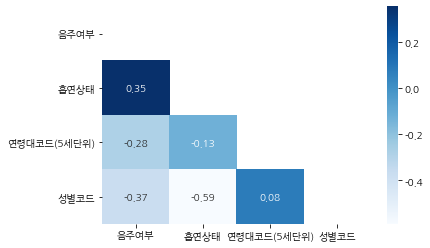

In [25]:
mask=np.triu(np.ones_like(df_corr,dtype=np.bool))
sns.heatmap(df_corr,mask=mask, annot=True,fmt='.2f',cmap='Blues')

## Q3. 흡연하는 사람과 음주하는 사람들의 수는 얼마나 차이가 있을까요?

- 건강보험에서 제공하고 있는 데이터는 용량을 줄이기 위해 대부분의 데이터를 숫자 형태로 제공하고 있습니다. replace 기능을 사용하면 딕셔너리의 값을 의미하는 문자 형태로 변경해 볼 수 있습니다. 다음 제공되는 딕셔너리 값을 사용하여 숫자가 의미하는 문자 형태로 변경한 뒤 전체 데이터에서 음주와 흡연에 대한 교차 테이블을 구해 각 해당 빈도수를 구하고 시각화 해주세요!
- groupby, pivot_table로 구할 수도 있지만, 수업에서는 다루지 않았던 pandas의 crosstab 기능을 사용해서도 비교적 쉽게 구할 수 있습니다.
- crosstab 을 사용할 때는 다음의 문서를 참고하여 구해보세요. pandas.crosstab — pandas documentation
- 그리고 막대그래프를 통해 결과를 시각화해주세요! 시각화를 할 때 그래프의 스타일이나 막대의 색상 등이 달라도 상관 없으니 사용하고 싶은 스타일을 적용해서 시각화해도 좋습니다.


In [6]:
smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

In [7]:
df['흡연상태'].replace(smoke, inplace=True)
df['음주여부'].replace(drink, inplace=True)

In [8]:
pd.crosstab(df['음주여부'],df['흡연상태'])

흡연상태,끊음,흡연안함,흡연중
음주여부,,,
마심,120779,213743,162166
안마심,55334,394503,52845


<AxesSubplot:xlabel='흡연상태', ylabel='count'>

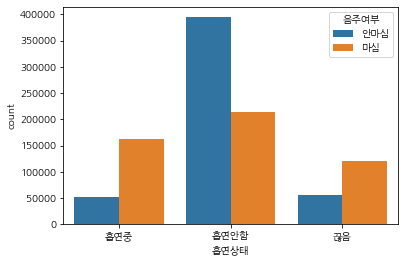

In [9]:
sns.countplot(data=df,x='흡연상태',hue='음주여부')

## Q4. 체중이 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요!

- 체중이 120Kg 이 넘는다면 비만으로 건강관리가 필요합니다. 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요! (이때 120Kg 도 포함되게 구합니다.) 그래프의 설정과 seaborn 버전에 따라 여백이나 회귀선의 시작과 끝점에 차이가 있을 수 있습니다.

In [14]:
fat_df = df[df['체중(5Kg 단위)']>=120]

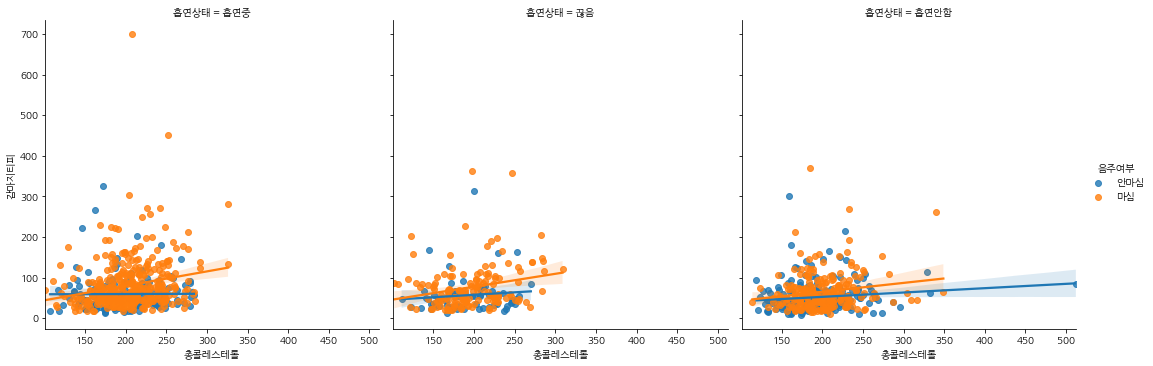

In [15]:
sns.lmplot(x='총콜레스테롤',y='감마지티피',data=fat_df,hue='음주여부',col='흡연상태')

## Q5. 연령대별로 시력은 얼마나 차이가 날까요? 연령대, 성별 좌우 평균 시력을 시각화 해주세요!

- 시력은 0.1~2.5 사이의 값으로 표기하며 0.1 이하의 시력은 0.1, 실명은 9.9로 표기합니다.

- 실명인 데이터를 평균에 포함하게 되면 시력에 대한 평균을 제대로 구하기 어렵습니다. 실명 데이터를 제외하고 연령대, 성별에 따른 평균 좌우 시력을 구해주세요!

- 서브플롯으로 시각화하여 표현해 주고 matplotlib 에 대한 사용법은 다음의 영상도 함께 참고해 주세요! (https://www.youtube.com/watch?v=ZTRKojTLE8M)

- 시각화 예시는 참고사항으로 스타일이나 폰트 구성이 달라도 연령대, 성별 좌우평균시력을 시각화 하면 됩니다.

In [71]:
can_see = df[(df['시력(좌)'] != 9.9) & (df['시력(우)'] != 9.9)]

<AxesSubplot:xlabel='시력(우)', ylabel='연령대'>

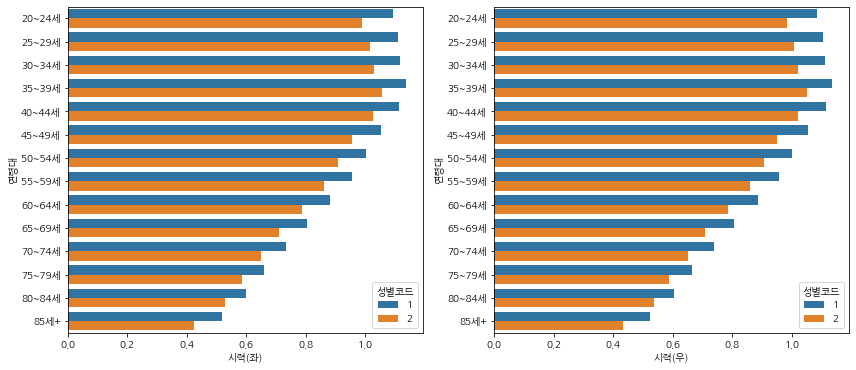

In [72]:
order = ['20~24세','25~29세','30~34세','35~39세','40~44세','45~49세','50~54세','55~59세','60~64세','65~69세','70~74세','75~79세','80~84세','85세+']
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(x='시력(좌)',y='연령대',order=order,data=can_see,hue='성별코드',ci=None)
plt.subplot(1,2,2)
sns.barplot(x='시력(우)',y='연령대',order=order,data=can_see,hue='성별코드',ci=None)